# Chapter 04. CNN architectures(1)

경희대학교 Hyper동아리에서 사용하는 자료입니다<br>
제작 : 소프트웨어융합학과 문희준<br>
무단으로 자료의 배포 및 유출을 금합니다<br>

2012년 딥러닝의 발전히 급격하게 이루어지면서, **CNN**을 기반으로 한 정교화된 분류 시스템을 향한 연구가 많이 이루어졌습니다.<br>
특히 **ImageNet 분류 대회**를 통해 다양한 모델들이 제시되었습니다<br>
이번 chatper에서는 다양한 CNN 모델을 살펴보도록 하겠습니다<br>




---

# 1. LeNet-5
1998년 LeCun에 의해 소개된 LeNet-5는 5개의 layer로 구성되어 있습니다.
**5X5 Conv filter(stride 1) 가 적용되었습니다. 또한 Pooling layer는 2X2 size이며, stride 2가 적용되었습니다.**<br>
LeNet-5의 구조는 아래와 같습니다. 

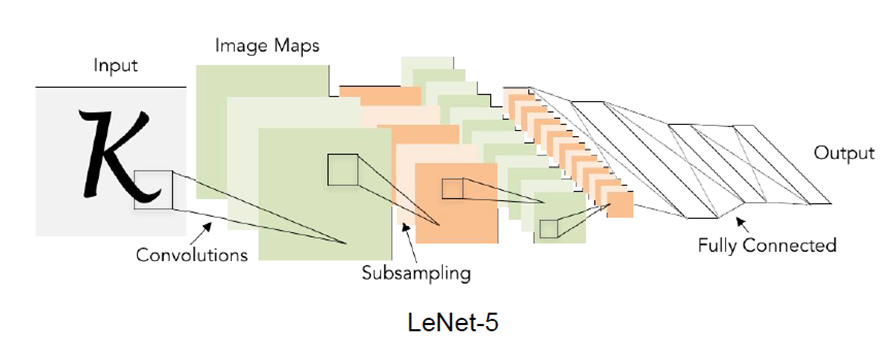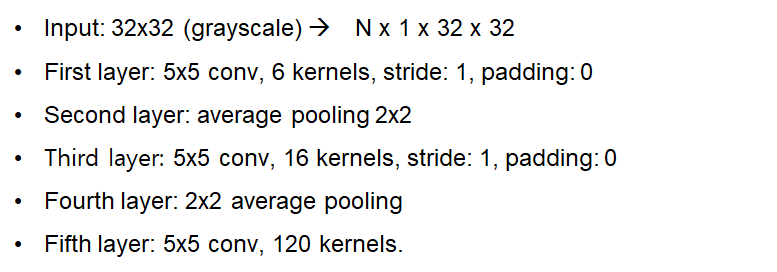

Keras를 이용하여 직접 LeNet-5를 구현해 보겠습니다.

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Input
from tensorflow.keras.models import Model, Sequential

class LeNet5(Sequential):

  def __init__(self, input_shape, num_classes):
    super().__init__()
    
    # 1st Block(Input + Conv2D + Avg_pooling)
    self.add(Conv2D(6, kernel_size=(5,5), strides=(1,1), padding='same', 
                 activation='relu', # 원래의 제시에서는 tanh로 제시되었으나, 모델의 성능을 위해 제가 relu로 바꿨습니다.
                 input_shape=input_shape))
    self.add(AveragePooling2D(pool_size=(2,2)))

    # 2nd Block(Conv2D + Avg_pooling)
    self.add(Conv2D(16, kernel_size=(5,5), strides=(1,1), padding='same',
                 activation='relu',
                 input_shape=input_shape))
    self.add(AveragePooling2D(pool_size=(2,2)))

    # FC layer
    self.add(Flatten()) # 2D -> 1D vectors
    self.add(Dense(120, activation='relu'))
    self.add(Dense(84, activation='relu'))
    self.add(Dense(num_classes, activation='softmax'))            

2021-07-23 21:57:48.444915: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


LeNet-5 모델을 인스턴스화 하고, 정보를 출력해보겠습니다

In [ ]:
# 논문에 제안된 img width, height은 32 X 32이나, 아래의 fashion_MNIST의 img는 28 X 28 사이즈이므로, 조정해주었습니다.
img_height = 28
img_width = 28 
img_channels = 1
input_shape = (img_height, img_width, img_channels)
num_classes = 10 # 10개의 의류 class

# Build model
model = LeNet5(input_shape=input_shape, num_classes=num_classes)

# Print model Info
print(model.summary())

2021-07-23 21:57:49.223683: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-07-23 21:57:50.840694: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:17:00.0 name: GeForce RTX 3090 computeCapability: 8.6
coreClock: 1.695GHz coreCount: 82 deviceMemorySize: 23.70GiB deviceMemoryBandwidth: 871.81GiB/s
2021-07-23 21:57:50.841489: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:65:00.0 name: GeForce RTX 3090 computeCapability: 8.6
coreClock: 1.695GHz coreCount: 82 deviceMemorySize: 23.70GiB deviceMemoryBandwidth: 871.81GiB/s
2021-07-23 21:57:50.841520: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-07-23 21:57:50.843755: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
202

Model: "le_net5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 7, 7, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               94200     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1016

모델을 compile한 이후, fashion-mnist 데이터에 대해 훈련시켜보겠습니다.


In [ ]:
# load data
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# normalize data
X_train, X_test = X_train.astype('float32')/255.0, X_test.astype('float32')/255.0 
X_train, X_test = X_train.reshape(-1,*input_shape), X_test.reshape(-1, *input_shape) 

# Make labels to one-hot encoding labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (60000, 28, 28, 1)
X_test shape: (10000, 28, 28, 1)
y_train shape: (60000, 10)
y_test shape: (10000, 10)


In [ ]:
# build model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train
model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))

2021-07-23 21:57:52.597774: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-07-23 21:57:52.616288: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 3699850000 Hz


Epoch 1/20


2021-07-23 21:57:52.916008: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2021-07-23 21:57:53.495326: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8100
2021-07-23 21:57:54.492708: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11


   1/1875 [..............................] - ETA: 1:22:12 - loss: 2.3038 - accuracy: 0.1250

2021-07-23 21:57:55.094095: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2021-07-23 21:57:55.100648: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1875/1875 [==============================] - 11s 5ms/step - loss: 0.5266 - accuracy: 0.8071 - val_loss: 0.4031 - val_accuracy: 0.8547
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3585 - accuracy: 0.8673 - val_loss: 0.3681 - val_accuracy: 0.8646
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3085 - accuracy: 0.8876 - val_loss: 0.3219 - val_accuracy: 0.8857
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2766 - accuracy: 0.8969 - val_loss: 0.3072 - val_accuracy: 0.8909
Epoch 5/20
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2535 - accuracy: 0.9062 - val_loss: 0.2816 - val_accuracy: 0.8979
Epoch 6/20
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2335 - accuracy: 0.9124 - val_loss: 0.2892 - val_accuracy: 0.8982
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2173 - accuracy: 0.9178 - val_loss: 0.2716 - val_accuracy: 0.9020
Ep

위에서 훈련 시킨 모델을 토대로, 모델의 분류 결과를 시각화 해보겠습니다!

/home/hj/.conda/envs/moon/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


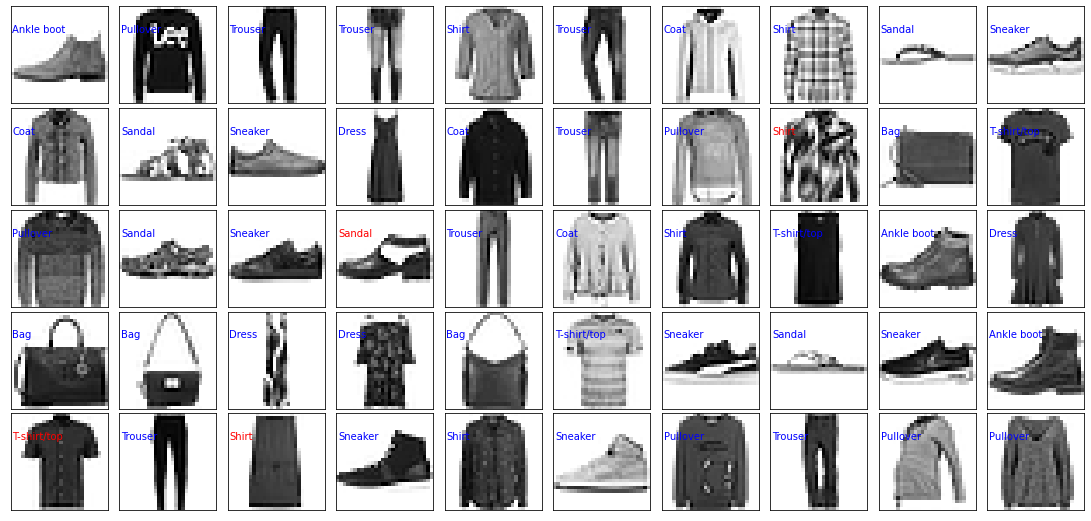

In [ ]:
import matplotlib.pyplot as plt

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Prediction
prediction_values = model.predict_classes(X_test)

# figure(그리기) 위한 set up
fig = plt.figure(figsize=(15, 7))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# Plot 50 images with prediction
for i in range(50):
    ax = fig.add_subplot(5, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i,:].reshape((28,28)),cmap=plt.cm.gray_r, interpolation='nearest')
  
     # If correct, label the image with the blue text
    if prediction_values[i] == np.argmax(y_test[i]):
        ax.text(0, 7, class_names[prediction_values[i]], color='blue')
    # If wrong, label the image with the red text
    else:
        ax.text(0, 7, class_names[prediction_values[i]], color='red')

위의 결과를 살펴보면은 50개의 이미지에서 2개의 잘못 분류된 것을 확인할 수 있었습니다.<br>
위와 같이 LeNet-5를 이용하여 이미지 분류를 해보았습니다.



---
# 2. AlexNet
AlexNet은 2012년 ImageNet challenge에서 제시된 모델입니다.
첫 CNN based의 우승작이었습니다.<br>
AlexNet의 구조는 아래와 같습니다


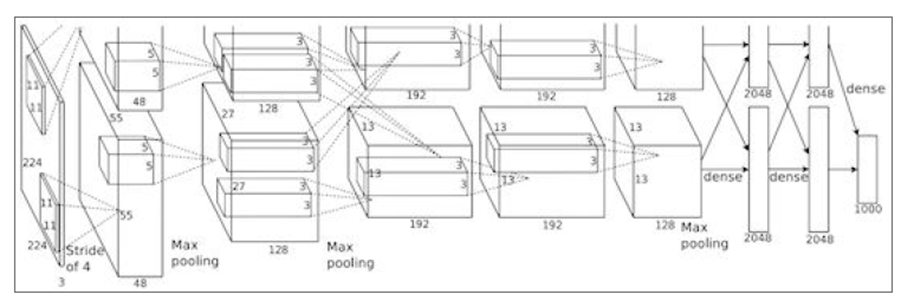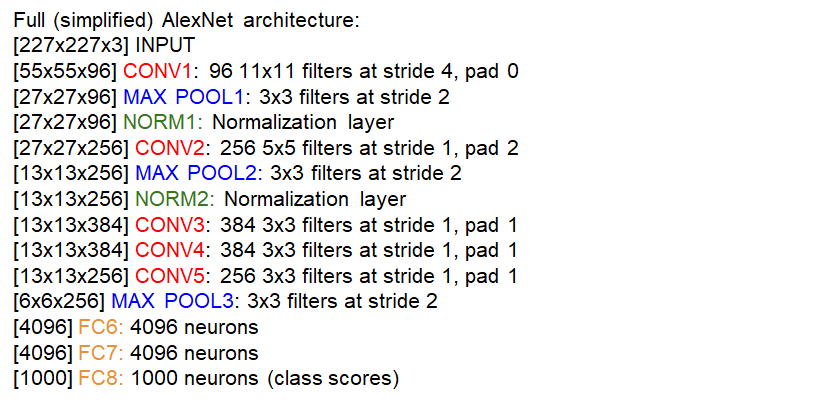

이 역시 마찬가지로 Keras를 이용하여 직접 구현하여 보겠습니다.
```python
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, BatchNormalization, Dropout
from tensorflow.keras.models import Model, Sequential

class AlexNet(Sequential):

  def __init__(self, input_shape=(227,227,3), num_classes):
    super().__init__()
    
    # 1st Block(Input + Conv2D + MaxPooling + Normalization)
    self.add(Conv2D(96, kernel_size=(11,11), strides=4, activation='relu', input_shape=input_shape))
    self.add(MaxPooling2D(pool_size=(3,3)), strides=(2,2))
    self.add(BatchNormalization())

    # 2nd Block(Input + Conv2D + MaxPooling + Normalization)
    self.add(Conv2D(256, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu'))
    self.add(MaxPooling2D(pool_size=(3,3)), strides=(2,2))
    self.add(BatchNormalization())

    # 3rd Block(Conv2D)
    self.add(Conv2D(384, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
    self.add(Conv2D(384, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
    self.add(Conv2D(256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
    self.add(MaxPooling2D(pool_size=(3,3)), strides=(2,2))

    # FC layer
    self.add(Flatten()) # 2D -> 1D vectors
    self.add(Dense(4096, activation='relu'))
    self.add(Dropout(0.5))
    self.add(Dense(4096, activation='relu'))
```

처음 제시된 AlexNet의 구현은 위와 같습니다.<br>
cifar-10의 image 크기는 32 X 32이므로 AlexNet8을 이용하여 훈련시켜보겠습니다

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, BatchNormalization, Dropout
from tensorflow.keras.models import Model, Sequential

class AlexNet8(Sequential):

  def __init__(self, input_shape, num_classes):
    super().__init__()
    
    # 1st Block(Input + Conv2D + MaxPooling + Normalization)
    self.add(Conv2D(96, kernel_size=(3,3), activation='relu', padding='same', input_shape=input_shape))
    self.add(BatchNormalization())
    self.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))


    # 2nd Block(Input + Conv2D + MaxPooling + Normalization)
    self.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
    self.add(BatchNormalization())
    self.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
    

    # 3rd Block(Conv2D)
    self.add(Conv2D(384, kernel_size=(3,3), padding='same', activation='relu'))
    self.add(Conv2D(384, kernel_size=(3,3), padding='same', activation='relu'))
    self.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
    self.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

    # FC layer
    self.add(Flatten()) # 2D -> 1D vectors
    self.add(Dense(2048, activation='relu'))
    self.add(Dropout(0.5))
    self.add(Dense(2048, activation='relu'))
    self.add(Dropout(0.5))
    self.add(Dense(num_classes, activation='softmax'))

이번에는 cifar-10 dataset을 이용하여 모델을 훈련시켜보겠습니다

In [ ]:
# load data
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# normalize data
X_train, X_test = X_train/255.0, X_test/255.0 

# Make labels to one-hot encoding labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (50000, 32, 32, 3)
X_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 10)
y_test shape: (10000, 10)


Model을 compile하고 summary를 출력해 보겠습니다.

In [ ]:
img_height = 32
img_width = 32
img_channels = 3
input_shape = (img_height, img_width, img_channels)
num_classes = 10 

# Build model
model = AlexNet8(input_shape=input_shape, num_classes=num_classes)

# Print model Info
print(model.summary())

Model: "alex_net8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 96)        2688      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       221440    
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 15, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 384)         88

이제 모델을 훈련시켜보겠습니다!

In [ ]:
# build model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train
model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test,y_test))

Epoch 1/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5807 - accuracy: 0.4243 - val_loss: 1.5269 - val_accuracy: 0.4793
Epoch 2/50
1563/1563 [==============================] - 13s 9ms/step - loss: 1.2556 - accuracy: 0.5559 - val_loss: 1.4653 - val_accuracy: 0.5012
Epoch 3/50
1563/1563 [==============================] - 13s 9ms/step - loss: 1.1266 - accuracy: 0.6064 - val_loss: 1.3713 - val_accuracy: 0.5320
Epoch 4/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0463 - accuracy: 0.6398 - val_loss: 1.3903 - val_accuracy: 0.5312
Epoch 5/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9916 - accuracy: 0.6609 - val_loss: 1.2358 - val_accuracy: 0.5657
Epoch 6/50
1563/1563 [==============================] - 13s 9ms/step - loss: 0.9255 - accuracy: 0.6820 - val_loss: 1.1037 - val_accuracy: 0.6266
Epoch 7/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9031 - accuracy: 0.6934 - val_loss: 0.9475 - val_ac

위에서 훈련 시킨 모델을 토대로, 모델의 분류 결과를 시각화 해보겠습니다!

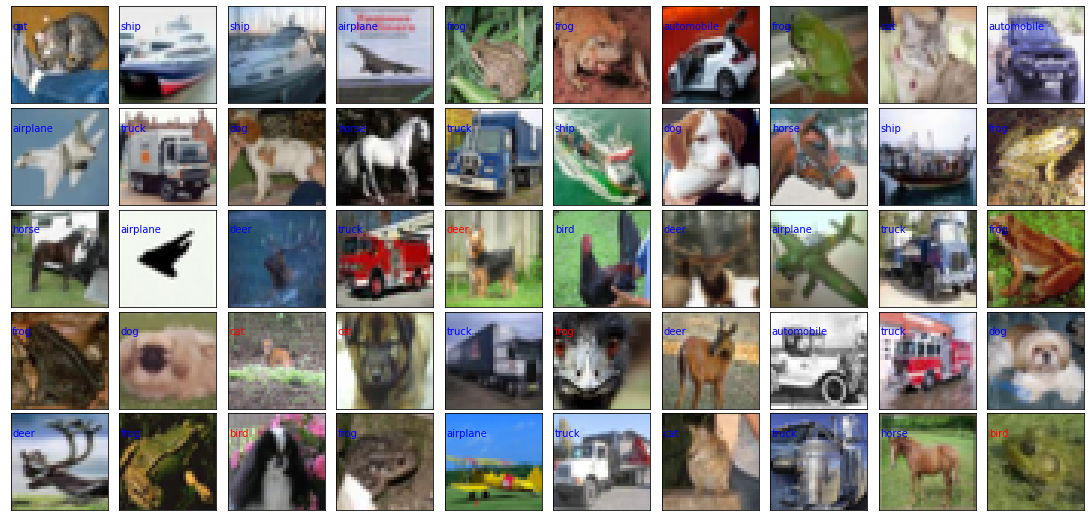

In [ ]:
import matplotlib.pyplot as plt

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Prediction
prediction_values = model.predict_classes(X_test)

# figure(그리기) 위한 set up
fig = plt.figure(figsize=(15, 7))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# Plot 50 images with prediction
for i in range(50):
    ax = fig.add_subplot(5, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i,:].reshape((32,32,3)),cmap=plt.cm.gray_r, interpolation='nearest')
  
     # If correct, label the image with the blue text
    if prediction_values[i] == np.argmax(y_test[i]):
        ax.text(0, 7, class_names[prediction_values[i]], color='blue')
    # If wrong, label the image with the red text
    else:
        ax.text(0, 7, class_names[prediction_values[i]], color='red')

위의 결과를 살펴보면 생각보다 많이 못 맞춘것을 확인할 수 있었습니다<br>
성능을 더욱 높이기 위해서는 **image augmentaion**을 통해 원본 샘플을 무작위로 변형시켜, 훈련 이미지를 확대해야 합니다<br><br>

**AlexNet이 남긴 의미는 다음과 같이 설명할 수 있습니다**<br>
1. 활성화 함수에서 처음으로 **ReLU 함수를 도입하였습니다. 이를 통해 기존 sigmoid, tanh에서 발생하는 vanishing gradient 문제를 해결하였습니다**<br>
2. **CNN에 Dropout을 적용하였습니다**
3. 합성곱(convolution layer)과 Pooling layer, Dense layer, Flatten layer를 도입한 전형적인 CNN 계층구조를 갖습니다

# 3. VGG

VGG는 2014년 Imagenet 분류대회에서 2등을 차지하였습니다만, 이 모델이 제시한 기법은 수많은 후속 연구에 영향을 끼쳤습니다<br>
VGG는 AlexNet이 달성했던 16.4%의 오차율을 7.3%로 획기적으로 개선하였습니다.<br>
VGG의 아키텍쳐는 아래와 같습니다.

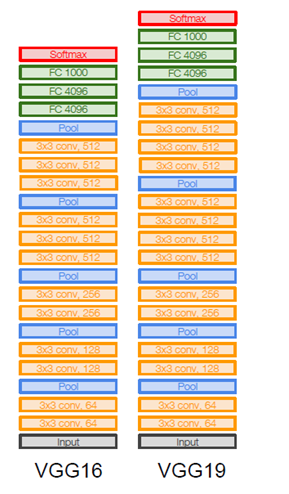

![image.png](attachment:image.png)

**지금까지 가장 성능이 우수해 지금도 보편적으로 사용되는 아키텍쳐는 VGG-16, VGG-19입니다.**<br>
16과 19는 아키텍의 깊이(훈련 가능한 layer 갯수)를 의미합니다.<br>
그럼 VGG가 남긴 의미는 무엇일까요? 지금부터 자세하게 설명드리겠습니다<br>

## 1. 규모가 큰 합성곱을 여러 작은 합성곱으로 대체
3X3 커널을 갖는 두 합성곱 계층은 5X5 커널의 합성곱 계층 1개와 **같은 Receptive Field(수용 영역)**을 갖습니다<br>
이를 확장시켜보면, 3x3 계층을 3개 연속으로 배치하면 7x7 1개, 3x3를 4개 연속으로 배치하면 9x9 1개와 같은 수용영역을 갖습니다<br>
**즉, 큰 거 1개를 작은 3x3로 쪼개는 것입니다. 일종의 divide & conquer 개념입니다**<br>
이렇게 잘게 쪼개면 2가지의 이점이 있습니다<br><br>
첫 번째로, **매개변수를 줄이는 것입니다.** 실제로 11x11의 매개변수 갯수는 121개이지만, 3x3 5개의 변수는 3x3x5 = 45개 밖에 되지 않습니다. 매개변수가 적을수록 **최적화가 용이하고, 학습도 적게 시킬 수 있으며, 무엇보다 overfitting 억제가 가능합니다**<br><br>

두 번째로는 **비선형성을 증가시키는 것입니다.** 합성곱 layer수가 많아질수록, **ReLu 같은 '비선형' 활성화 함수가 많아지게 되어서, 비선형 연산이 많아져, 네트워크가 복잡한 특징을 학습할 수 있는 능력이 증대됩니다.**

## 2. 특징 맵 깊이를 증가
합성곱 연산층에서 커널의 갯수를 늘림으로써, output의 depth(커널 연산 결과)가 깊어지게 됩니다. 이를 통해 더 복잡하고 차별적인 특징을 활용하는 인코더를 사용할 수 있습니다.

## 3. 척도 변경을 통한 데이터 보강
원본 이미지를 아래와 같이 다양하게 **resizing, cropping, flipping**하면서 여러개의 이미지를 추가로 만듭니다<br>
이를 통해서 **모델이 학습할 데이터 수가 증가하면서, 모델은 다양한 이미지 척도에 대해 분류하는 방법을 학습하게 됩니다. 그 결과, 더욱 더 견고한 모델을 만들 수 있습니다**<br>

![image.png](attachment:image.png)

## 4. 완전 연결 계층(FC layer)을 합성곱 계층으로 대체
전통적인 VGG 아키텍쳐는 마지막에 여러 개의 **완전 연결 계층**을 둡니다<br>
하지만 이후에 제안된 **VGG 아키텍쳐는 밀집 계층을 합성곱 계층으로 대체합니다**<br>
이러한 밀집 계층을 두지 않는 네트워크를 **완전 합성곱 계층(Fully convolutional network)라 부릅니다.<br>**
또한 다양한 크기의 이미지에 적용될 수 있습니다.

이제 Keras를 이용하여 직접 구현해 보겠습니다.<br>
```python
class VGG_16(Sequential):

  def __init__(self, input_shape, num_classes):
    super().__init__()
    
    # 1st Block(Input + Conv2D + Conv2D + MaxPooling)
    self.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same', input_shape=input_shape))
    self.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
    self.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    # 2nd Block(Conv2D + Conv2D + MaxPooling)
    self.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))
    self.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))              
    self.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    
    # 3rd Block(Conv2D + Conv2D +  Conv2D + MaxPooling)
    self.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
    self.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
    self.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
    self.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
              
    # 4th Block(Conv2D + Conv2D + Conv2D + MaxPooling)
    self.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
    self.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
    self.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
    self.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
              
    # 5th Block(Conv2D + Conv2D + Conv2D + MaxPooling)
    self.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
    self.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
    self.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
    self.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
              
    # 6th Block(FC layer
    self.add(Flatten())
    self.add(Dense(4096, activation='relu'))
    self.add(Dense(4096, activation='relu'))
    self.add(Dense(num_classes, activation='softmax'))
```
실제 논문에서 제시된 VGG16의 구조는 위와 같습니다.<br>

**Tensorflow에서는 라이브러리에 직접 VGG16을 구현하였습니다.<br>
위와 같이 일일이 정의해 주지 않아도 다음과 같이 사용할 수 있습니다<br>**
```python
vgg_net = tf.keras.applications.VGG16(
    include_top=True, # 구현되어있는 VGG의 Dense layer를 포함한다는 뜻입니다. False의 경우 새로운 Dense layer를 추가해줘야합니다
    weights='imagenet', # imagenet으로 사전 훈련된 weight값을 초기 weight로 갖는다는 뜻입니다
    input_tensor=None, # 입력으로 받는 tensor
    input_shpae=None, # 입력으로 받는 input의 shape(구조)를 의미합니다
    poooling=None, # pooling의 종류를 의미합니다. 'max', 'avg'...
    classes=1000 # 분류할 class의 숫자를 의미합니다
)
```
아래의 모델은 작은 이미지 사이즈로 인하여 수정한 VGG16입니다.

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, BatchNormalization, Dropout
from tensorflow.keras.models import Model, Sequential

class cifar10_VGG16(Sequential):

  def __init__(self, input_shape, num_classes):
    super().__init__()
    
    # 1st Block(Input + Conv2D + Conv2D + MaxPooling)
    self.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same', input_shape=input_shape))
    self.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
    self.add(BatchNormalization())
    self.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    self.add(Dropout(0.4))

    # 2nd Block(Conv2D + Conv2D + MaxPooling)
    self.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))
    self.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))   
    self.add(BatchNormalization())
    self.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    self.add(Dropout(0.4))
    
    # 3rd Block(Conv2D + Conv2D + MaxPooling)
    self.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
    self.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
    self.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))    
    self.add(BatchNormalization())    
    self.add(Dropout(0.5))
              
    # 6th Block(FC layer
    self.add(Flatten())
    self.add(Dense(256, activation='relu'))
    self.add(Dropout(0.5))
    self.add(Dense(256, activation='relu'))
    self.add(Dropout(0.5))
    self.add(Dense(num_classes, activation='softmax'))

만든 모델의 정보를 출력해보겠습니다.

In [ ]:
# cifar-10 info
img_height = 32
img_width = 32
img_channels = 3
input_shape = (img_height, img_width, img_channels)
num_classes = 10 

# Build model
model = cifar10_VGG16(input_shape=input_shape, num_classes=num_classes)

# Print model Info
print(model.summary())

Model: "cifar10_vg_g16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 128)    

이제 모델을 compile한 이후에, 훈련시켜 보겠습니다!

In [ ]:
# load data
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# normalize data
X_train, X_test = X_train/255.0, X_test/255.0 

# Make labels to one-hot encoding labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (50000, 32, 32, 3)
X_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 10)
y_test shape: (10000, 10)


In [ ]:
# build model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train
model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test,y_test))

Epoch 1/20
1563/1563 [==============================] - 17s 11ms/step - loss: 2.0115 - accuracy: 0.2565 - val_loss: 1.6287 - val_accuracy: 0.4236
Epoch 2/20
1563/1563 [==============================] - 16s 10ms/step - loss: 1.5805 - accuracy: 0.4187 - val_loss: 1.3583 - val_accuracy: 0.5221
Epoch 3/20
1563/1563 [==============================] - 16s 10ms/step - loss: 1.3508 - accuracy: 0.5252 - val_loss: 1.1185 - val_accuracy: 0.6043
Epoch 4/20
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1764 - accuracy: 0.5925 - val_loss: 1.1919 - val_accuracy: 0.5865
Epoch 5/20
1563/1563 [==============================] - 17s 11ms/step - loss: 1.0594 - accuracy: 0.6426 - val_loss: 0.9553 - val_accuracy: 0.6766
Epoch 6/20
1563/1563 [==============================] - 18s 11ms/step - loss: 0.9787 - accuracy: 0.6699 - val_loss: 0.9157 - val_accuracy: 0.6966
Epoch 7/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9169 - accuracy: 0.6937 - val_loss: 0.8518 -

모델의 분류 결과를 시각해 보겠습니다

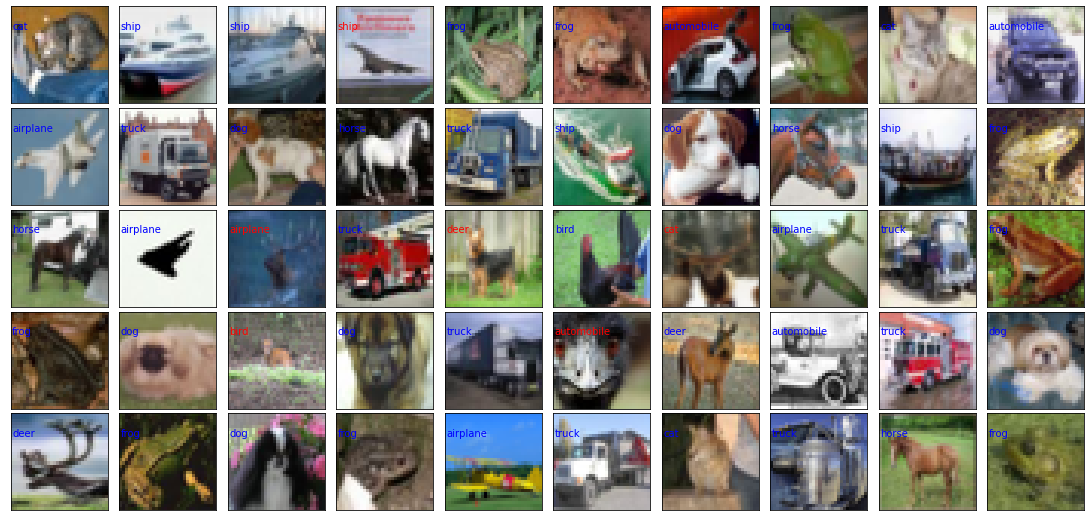

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Prediction
prediction_values = model.predict_classes(X_test)

# figure(그리기) 위한 set up
fig = plt.figure(figsize=(15, 7))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# Plot 50 images with prediction
for i in range(50):
    ax = fig.add_subplot(5, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i,:].reshape((32,32,3)),cmap=plt.cm.gray_r, interpolation='nearest')
  
     # If correct, label the image with the blue text
    if prediction_values[i] == np.argmax(y_test[i]):
        ax.text(0, 7, class_names[prediction_values[i]], color='blue')
    # If wrong, label the image with the red text
    else:
        ax.text(0, 7, class_names[prediction_values[i]], color='red')

앞선 AlexNet보다 개선된 성능을 보여줍니다.<br>
그러나 VGG 역시 network가 깊어질수록, **backpropagation에 필요한 gradient값이 뒤에서 앞으로 갈수록 감소한다는 문제(Vanishing gradient)가 발생합니다**<br>
이로 인하여 overfitting과 같은 문제가 발생합니다.

# LAB
3가지 CNN 아키텍쳐와 다양한 dataset을 가지고 모델을 학습시켜 보았습니다<br>
이제 여러분들은 위의 코드들을 변형하여, 더 많은 아키텍쳐와 dataset을 가지고 하실 수 있을 겁니다<br>
이번 실습은 위에 설명되어 있는 각 모델을 직접 구현해보고, 훈련시켜보는 것입니다<br>

X_train shape: (60000, 28, 28, 1)
X_test shape: (10000, 28, 28, 1)
y_train shape: (60000, 10)
y_test shape: (10000, 10)
Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5373 - accuracy: 0.8043 - val_loss: 0.4226 - val_accuracy: 0.8462
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3576 - accuracy: 0.8697 - val_loss: 0.3863 - val_accuracy: 0.8516
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3039 - accuracy: 0.8881 - val_loss: 0.3123 - val_accuracy: 0.8853
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2730 - accuracy: 0.8978 - val_loss: 0.2915 - val_accuracy: 0.8931
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2486 - accuracy: 0.9071 - val_loss: 0.2867 - val_accuracy: 0.8963
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2309 - accuracy: 0.9129 - val_loss: 0.2735 - val_accuracy: 0.9040
Epoch 7/20
1875/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


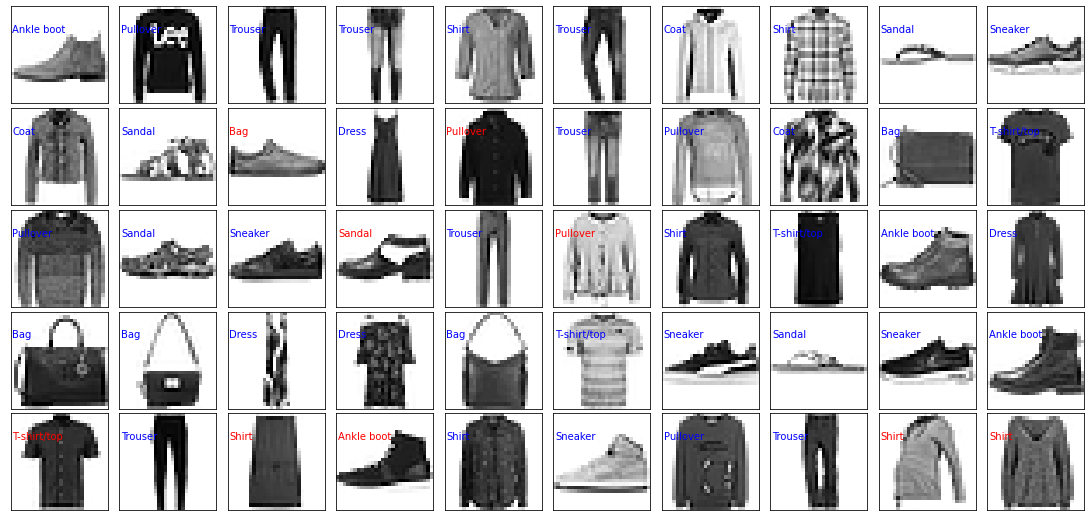

In [2]:
# LeNet
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

class LeNet5(Sequential):
  def __init__(self, input_shape, num_classes):
    super().__init__()

    self.add(Conv2D(6, kernel_size=(5,5), strides=(1,1), padding='same', 
                 activation='relu',
                 input_shape=input_shape))
    self.add(AveragePooling2D(pool_size=(2,2)))

    self.add(Conv2D(16, kernel_size=(5,5), strides=(1,1), padding='same',
                 activation='relu',
                 input_shape=input_shape))
    self.add(AveragePooling2D(pool_size=(2,2)))

    self.add(Flatten())
    self.add(Dense(120, activation='relu'))
    self.add(Dense(84, activation='relu'))
    self.add(Dense(num_classes, activation='softmax'))            

img_height = 28
img_width = 28 
img_channels = 1
input_shape = (img_height, img_width, img_channels)
num_classes = 10

model = LeNet5(input_shape=input_shape, num_classes=num_classes)

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train.astype('float32')/255.0, X_test.astype('float32')/255.0 
X_train, X_test = X_train.reshape(-1,*input_shape), X_test.reshape(-1, *input_shape) 
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

prediction_values = model.predict_classes(X_test)

fig = plt.figure(figsize=(15, 7))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(50):
    ax = fig.add_subplot(5, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i,:].reshape((28,28)),cmap=plt.cm.gray_r, interpolation='nearest')
  
    if prediction_values[i] == np.argmax(y_test[i]):
        ax.text(0, 7, class_names[prediction_values[i]], color='blue')
    else:
        ax.text(0, 7, class_names[prediction_values[i]], color='red')

X_train shape: (50000, 32, 32, 3)
X_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 10)
y_test shape: (10000, 10)
Epoch 1/20
1563/1563 [==============================] - 24s 15ms/step - loss: 1.5534 - accuracy: 0.4386 - val_loss: 1.4352 - val_accuracy: 0.5102
Epoch 2/20
1563/1563 [==============================] - 23s 15ms/step - loss: 1.2215 - accuracy: 0.5661 - val_loss: 1.8395 - val_accuracy: 0.4060
Epoch 3/20
1563/1563 [==============================] - 23s 15ms/step - loss: 1.1124 - accuracy: 0.6128 - val_loss: 1.7920 - val_accuracy: 0.4272
Epoch 4/20
1563/1563 [==============================] - 23s 15ms/step - loss: 1.0355 - accuracy: 0.6460 - val_loss: 1.3185 - val_accuracy: 0.5634
Epoch 5/20
1563/1563 [==============================] - 24s 16ms/step - loss: 0.9721 - accuracy: 0.6688 - val_loss: 1.4526 - val_accuracy: 0.5167
Epoch 6/20
1563/1563 [==============================] - 23s 15ms/step - loss: 0.9351 - accuracy: 0.6843 - val_loss: 0.9063 - val_accuracy: 0.6858
Epoc

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


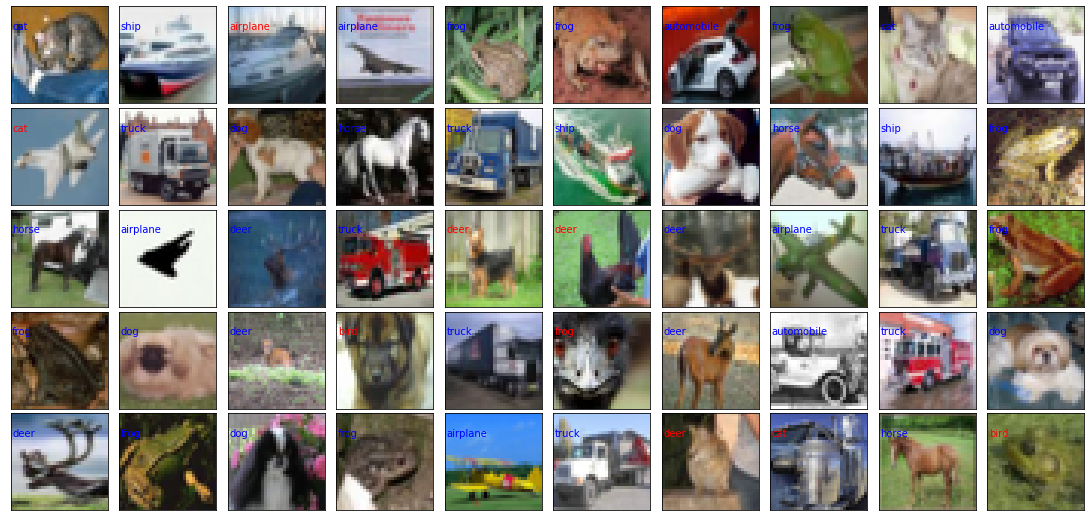

In [4]:
# AlexNet
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, BatchNormalization, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

class AlexNet8(Sequential):
  def __init__(self, input_shape, num_classes):
    super().__init__()
    
    self.add(Conv2D(96, kernel_size=(3,3), activation='relu', padding='same', input_shape=input_shape))
    self.add(BatchNormalization())
    self.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

    self.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
    self.add(BatchNormalization())
    self.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
    
    self.add(Conv2D(384, kernel_size=(3,3), padding='same', activation='relu'))
    self.add(Conv2D(384, kernel_size=(3,3), padding='same', activation='relu'))
    self.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
    self.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

    self.add(Flatten()) # 2D -> 1D vectors
    self.add(Dense(2048, activation='relu'))
    self.add(Dropout(0.5))
    self.add(Dense(2048, activation='relu'))
    self.add(Dropout(0.5))
    self.add(Dense(num_classes, activation='softmax'))

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train, X_test = X_train/255.0, X_test/255.0 
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

img_height = 32
img_width = 32
img_channels = 3
input_shape = (img_height, img_width, img_channels)
num_classes = 10 

model = AlexNet8(input_shape=input_shape, num_classes=num_classes)

model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test,y_test))

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

prediction_values = model.predict_classes(X_test)

fig = plt.figure(figsize=(15, 7))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(50):
    ax = fig.add_subplot(5, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i,:].reshape((32,32,3)),cmap=plt.cm.gray_r, interpolation='nearest')
  
    if prediction_values[i] == np.argmax(y_test[i]):
        ax.text(0, 7, class_names[prediction_values[i]], color='blue')
    else:
        ax.text(0, 7, class_names[prediction_values[i]], color='red')

X_train shape: (50000, 32, 32, 3)
X_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 10)
y_test shape: (10000, 10)
Epoch 1/20
1563/1563 [==============================] - 18s 10ms/step - loss: 1.9696 - accuracy: 0.2786 - val_loss: 1.5483 - val_accuracy: 0.4380
Epoch 2/20
1563/1563 [==============================] - 16s 10ms/step - loss: 1.5120 - accuracy: 0.4524 - val_loss: 1.2819 - val_accuracy: 0.5641
Epoch 3/20
1563/1563 [==============================] - 15s 10ms/step - loss: 1.2735 - accuracy: 0.5537 - val_loss: 1.1084 - val_accuracy: 0.6147
Epoch 4/20
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1340 - accuracy: 0.6111 - val_loss: 1.0202 - val_accuracy: 0.6449
Epoch 5/20
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0379 - accuracy: 0.6494 - val_loss: 0.8435 - val_accuracy: 0.7205
Epoch 6/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9562 - accuracy: 0.6793 - val_loss: 0.8022 - val_accuracy: 0.7372
Epoc

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


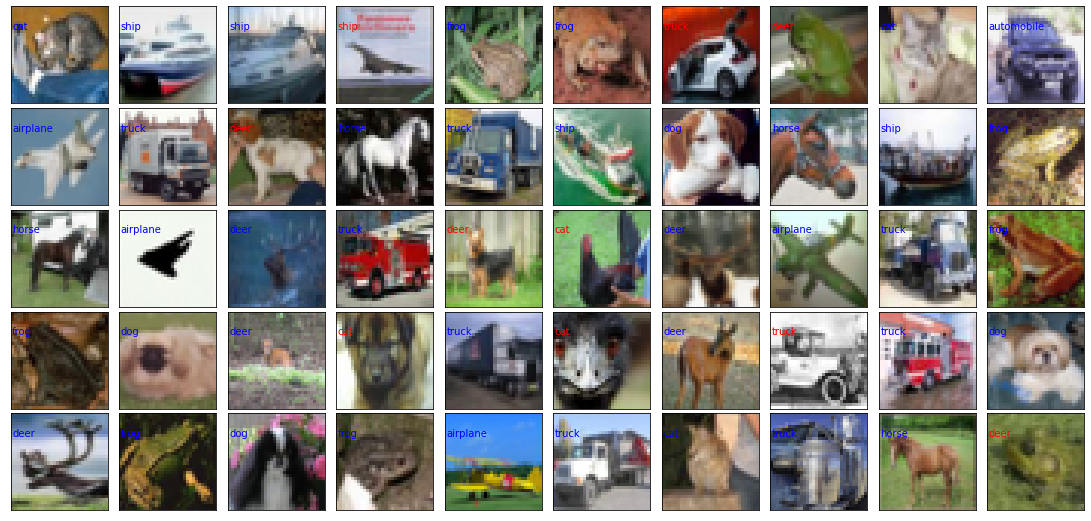

In [5]:
# VGG16
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, BatchNormalization, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

class cifar10_VGG16(Sequential):
  def __init__(self, input_shape, num_classes):
    super().__init__()

    self.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same', input_shape=input_shape))
    self.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
    self.add(BatchNormalization())
    self.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    self.add(Dropout(0.4))

    self.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))
    self.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))   
    self.add(BatchNormalization())
    self.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    self.add(Dropout(0.4))
    
    self.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
    self.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
    self.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))    
    self.add(BatchNormalization())    
    self.add(Dropout(0.5))
              
    self.add(Flatten())
    self.add(Dense(256, activation='relu'))
    self.add(Dropout(0.5))
    self.add(Dense(256, activation='relu'))
    self.add(Dropout(0.5))
    self.add(Dense(num_classes, activation='softmax'))

img_height = 32
img_width = 32
img_channels = 3
input_shape = (img_height, img_width, img_channels)
num_classes = 10 

model = cifar10_VGG16(input_shape=input_shape, num_classes=num_classes)

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train, X_test = X_train/255.0, X_test/255.0 

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test,y_test))

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

prediction_values = model.predict_classes(X_test)

fig = plt.figure(figsize=(15, 7))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(50):
    ax = fig.add_subplot(5, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i,:].reshape((32,32,3)),cmap=plt.cm.gray_r, interpolation='nearest')
  
    if prediction_values[i] == np.argmax(y_test[i]):
        ax.text(0, 7, class_names[prediction_values[i]], color='blue')
    else:
        ax.text(0, 7, class_names[prediction_values[i]], color='red')

# Reference
- 실전! 텐서플로 2로 배우는 컴퓨터 비전 딥러닝 chapter 03
- 경희대학교 소프트웨어융합학과 로봇센서데이터 수업 lecture note

## 수고하셨습니다^^
